<h2>Task: Simulation</h2>

Implement a simulation of the Ising model using the following rules:

1. Use periodic boundary conditions.
2. The neighborhood of a cell should follow the Von Neumann neighborhood model.
3. Initialize the state randomly.
4. Repeat the following:

    a. Pick a random cell $(i, j)$ .
    
    b. Check how well the cell is aligned with its neighbors by computing the product of the central cell with each neighbor. If two cells are aligned (have the same sign), their product will be +1. If two cells are misaligned (have opposite signs), their product will be –1. For reasons that will be become clear later, the negative of the sum of all these products is called the energy of the cell.

    c. Flip the sign of cell $(i, j)$ with probability $min(1, e^{2E_{i,j}/T} )$ where $T > 0$ parameter of the model, known as the temperature. (The temperature here is a unitless quantity — we will convert it to a temperature in Kelvin in Session 12.2.)


Use a 10 × 10 grid to
test and debug your code. You can try larger grids once your model is working properly. Run and
observe the state of your simulation for temperatures $T = 1, 2, 3, 4, 5 $.



In [1]:
import numpy as np

def random_spin_field(N, M):
    return np.random.choice([-1, 1], size=(N, M))

random_spin_field(10, 10)

array([[ 1, -1,  1,  1,  1,  1,  1, -1,  1, -1],
       [ 1,  1,  1,  1, -1,  1, -1,  1,  1, -1],
       [-1,  1, -1,  1,  1,  1,  1, -1,  1, -1],
       [ 1,  1,  1,  1,  1, -1,  1,  1, -1, -1],
       [-1,  1, -1,  1,  1,  1,  1,  1, -1, -1],
       [-1, -1,  1,  1,  1,  1,  1,  1,  1, -1],
       [ 1, -1, -1, -1, -1, -1,  1, -1, -1,  1],
       [-1,  1, -1,  1,  1, -1, -1, -1, -1,  1],
       [ 1,  1, -1,  1,  1,  1, -1, -1, -1, -1],
       [-1, -1, -1,  1, -1,  1,  1,  1,  1,  1]])

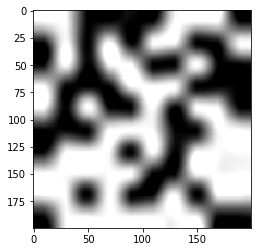

In [110]:
# pip install pillow
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def display_spin_field(field):
    img = Image.fromarray(np.uint8((field + 1) * 0.5 * 255))  # 0 ... 255
    return img.resize((200,200), Image.LANCZOS)

plt.imshow(display_spin_field(random_spin_field(10, 10)))

In [111]:
np.random.seed(5)

def ising_model_sim(field, T):
    
    i,j = np.random.choice(field.shape[0]),np.random.choice(field.shape[0])

    random_cell = field[(i,j)]

    top_n = field[((i-1)%field.shape[0],j)]
    bottom_n = field[((i+1)%field.shape[0],j)]
    left_n = field[(i,(j-1)%field.shape[0])]
    right_n = field[(i,(j+1)%field.shape[0])]


    cell_energy = -(sum([random_cell*top_n,
                         random_cell*bottom_n,
                         random_cell*left_n,
                         random_cell*right_n]))

    if np.random.uniform() < min(1,np.exp(2*cell_energy/T)):
        field[(i,j)] = -random_cell
        
    return field
    


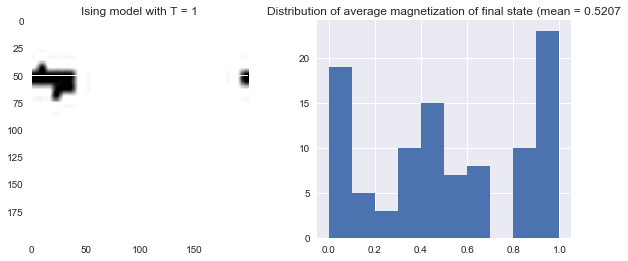

<Figure size 432x288 with 0 Axes>

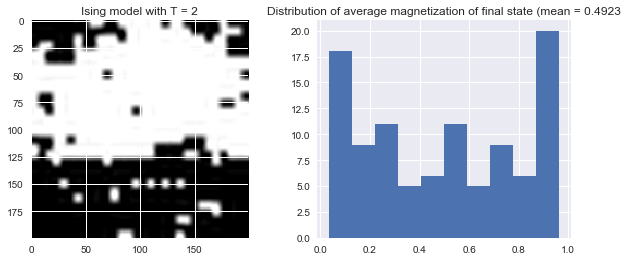

<Figure size 432x288 with 0 Axes>

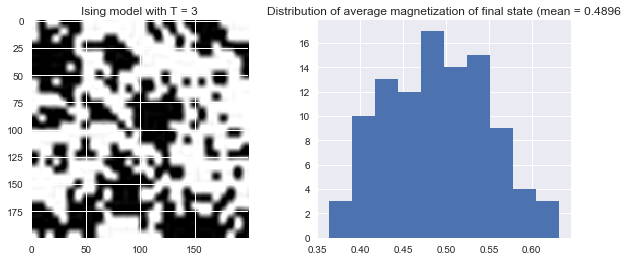

<Figure size 432x288 with 0 Axes>

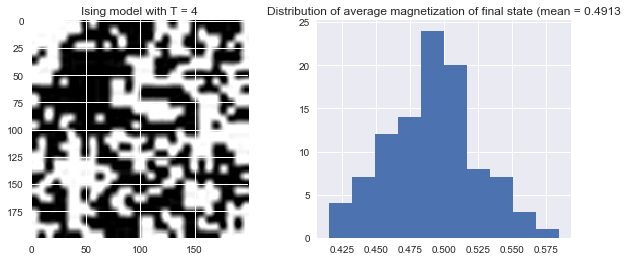

<Figure size 432x288 with 0 Axes>

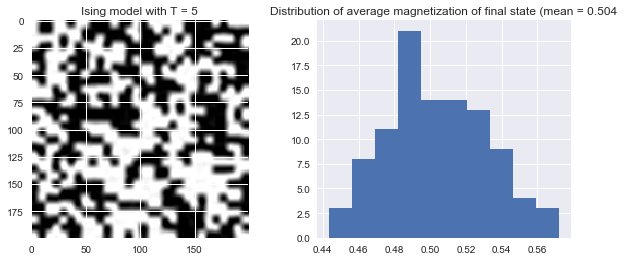

<Figure size 432x288 with 0 Axes>

In [129]:
import seaborn as sns
sns.set()

for T in [1,2,3,4,5]:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title(f"Ising model with T = {T}")
    
    avg_magnet_lst = []
    for sim in range(100):
        field = random_spin_field(30, 30)
        for i in range(100000):
            field = ising_model_sim(field, T)
        magnetized = np.count_nonzero(field == 1)
        avg_magnet = magnetized/(field.shape[0]*field.shape[0])
        avg_magnet_lst.append(avg_magnet)
    
    plt.imshow(display_spin_field(field))
    
    plt.subplot(1,2,2)
    plt.title(f"Distribution of average magnetization of final state (mean = {round(np.mean(avg_magnet_lst),4)}")
    plt.hist(avg_magnet_lst)
    plt.show()
    plt.tight_layout()
    

<h2>Reflection Poll</h2>

<b>Explain in your own words (a) what it means for a model to have a phase transition and (b) what is qualitatively different above and below the Curie temperature in the Ising model.</b>

We say that model has gone through a phase transition when an adjustment of various variables within the model's phase space causes the model to adopt distinctively different qualitative attributes in the new phase vs the original one. For exampl,e when temperature is high enough and pressure is low enough, a solid becomes a liquid - solids and liquid have distinctively different qualitative properties, and so we say that a phase transition has occurred. In the Ising model, the ferromagnetic material initially has magnetic properties, but loses this properties in a phase transition when the when it is heated above the Curie temperature. When it is allowed to cool down below the Curie temperature, the phase transition reverts and the material regains its magnetic qualities.

<h2>Summary</h2>

The focus of this session was learning about Markov chain Monte Carlo methods and implementing them within an Ising model. A Markov chain is a sequence of states where the value of a future state only depends on the current state, and not the historical states before that. It is generally used for modelling events without a strong historical dependency, e.g. weather, stock market, music sequence.

The Ising model is a very simple approximation of how ferromagnets work. The model can be simulated using a Markov Chain since the next magnetization state of the atoms can be inferred from the current state.

In class, students discussed the reason that the magnetization state becomes more random when $T$ increases. This is because as $T$ increases, then in the step of "Flip the sign of cell $(i, j)$ with probability $min(1, e^{2E_{i,j}/T} )$", we will constantly be flipping states, and we get a very random final state.

The Ising model demonstrates how a relatively simple concept such as a Markov chain (which isn't that simple when thought of in its recursive form, but can be perceived as simple when we consider that it only makes use of current states to predict future states) can be used to explain the sequence of states and  predict the final state of a given phenomenon. In this case, the phenomenon is a material's potential magnetic qualities.